# What are Notebooks
Why use them?
-datascience
-education
-presentations
Behind the scenes features 
Old workflow
New workflow
Exploratory Data Analysis
-Highlight ease of sharing results & code
-Highlight quick statistical charting
-Highlight interactive coding
-Highlight interactive charting & reporting
-Markdown & Latex documentation
-magic operator ?variable variable?? ?
-directory nav commands
-! to run other cli commands
-%run to run other scripts
-convert nb to script
-; to suppress output
-you can run inside another IDE= IDECEPTION!
When to not use it...


<center><h1>Developing Differently</h1></center>
<center><h1>with</h1></center>
![alt text](https://datascienceinsider.files.wordpress.com/2015/12/jupyter-logo.png)

## What are Notebooks?
* A somewhere between an ***IDE*** and an ***Interpreter***
* Repeatable, interactive & visual
* Self supporting documentation
* Language Agnostic


# Where do Notebooks get used?
* Data Analytics
    * Interative
    * Visual
    * Connect to distributed computing resources
* Education
    * Descriptive
    * Example => Results
    * Modular, not monolithic
* Presentations
    * Easy to format
    * Run code live (& test before hand)

![alt text](./images/workflow.png)

# Exploratory Data Analysis

>**In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.**

### Getting started...
* What do I have to work with?

In [13]:
ls

 Volume in drive C is OSDisk
 Volume Serial Number is 58A9-006C

 Directory of C:\Users\G540924\Desktop\GitHub\cc7_jupyter_nb

07/27/2016  01:44 PM    <DIR>          .
07/27/2016  01:44 PM    <DIR>          ..
07/27/2016  10:09 AM                75 .gitignore
07/26/2016  10:04 AM    <DIR>          .ipynb_checkpoints
07/27/2016  12:49 PM    <DIR>          data
07/27/2016  12:49 PM    <DIR>          images
07/27/2016  01:44 PM             8,028 Presentation.ipynb
07/26/2016  09:59 AM                57 README.md
07/27/2016  10:41 AM            62,113 workflow.vsdx
               4 File(s)         70,273 bytes
               5 Dir(s)  51,382,386,688 bytes free


In [28]:
import pandas as pd
df = pd.read_csv('./data/college.csv')
df.columns

Index(['Expenditure', 'Income', 'region', 'year'], dtype='object')

* **What's going on above?**
    * Import Python Data Analysis Library - Pandas
    * Read the csv file into memory
    * Display the results back in nice format

* **Try it**
    * What's the difference between `print(df.head())` and `df.head()`?
    * What does `;` at the end of a cell do?

In [37]:
df.describe()

,Expenditure,Income,year
count,150.000000,150.000000,150.000000
mean,166.444800,3813.677333,2014.000000
std,62.620749,1037.975873,0.819232
min,55.000000,1602.000000,2013.000000
25%,117.610000,3088.000000,2013.000000
50%,161.300000,3836.000000,2014.000000
75%,215.390000,4436.500000,2015.000000
max,326.000000,6484.000000,2015.000000


* **What's going on above?**
    * Get Summary Statistics
    * Region is not present because it is not numerical
    * Year is being summarized because it is being treated numerically

* **Try it**
    * Change Year to be a Categorical variable
        * `df['year'] = df['year'].astype('category')`
    * What is `df`?
        * `?df`

In [ ]:
avg_df = df.groupby(['region']).mean()
avg_df.head()

* **What's going on above?**
    * Aggregating data by the Region and then taking the average

* **Try it**
    * Rename Columns so we know they are averages
        * `avg_df = avg_df.rename(columns={'Expenditure': 'Avg_Exp', 'Income': 'Avg_Income'})`
    * How many records are there for each year?

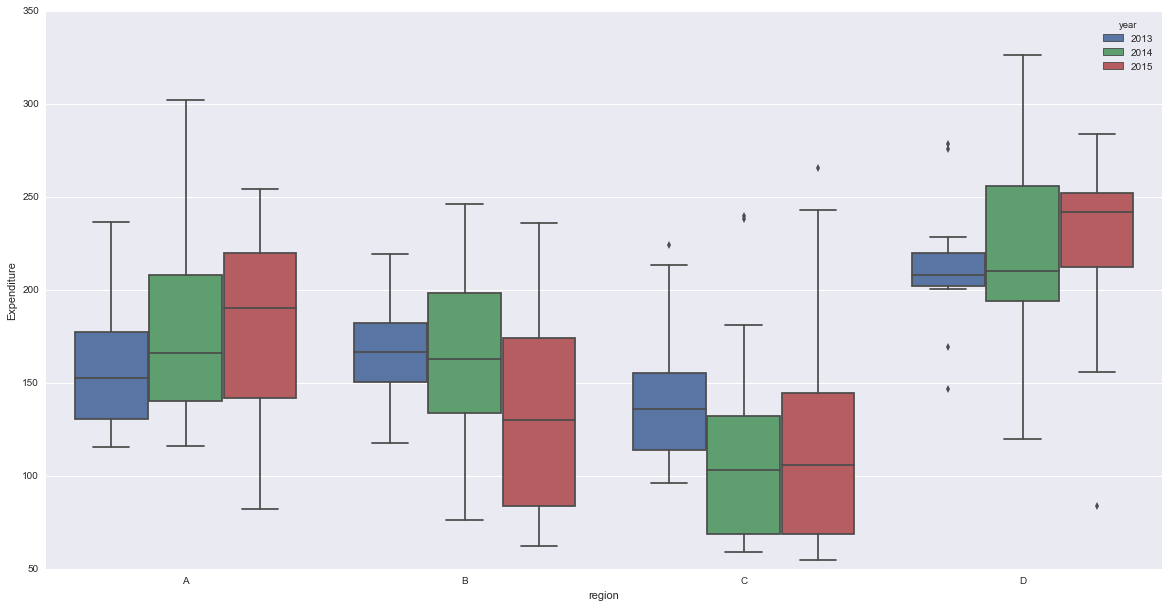

In [20]:
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

import seaborn as sns

ax = sns.boxplot(x="region", y="Expenditure", hue="year", data=df)

* **What's going on above?**
    * Use the magic function to plot inline
    * Set the plot size (so it presents well)
    * Import statiscal visualization library - Seaborn
    * Box plot expenidures by its categorical variables

* **Try it**
    * Look at incomes

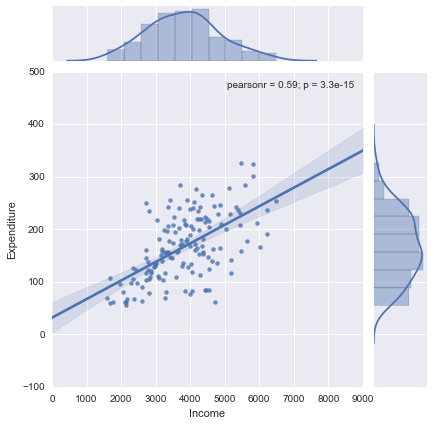

In [57]:
ax = sns.jointplot(x="Income", y="Expenditure", data=df, kind="reg")

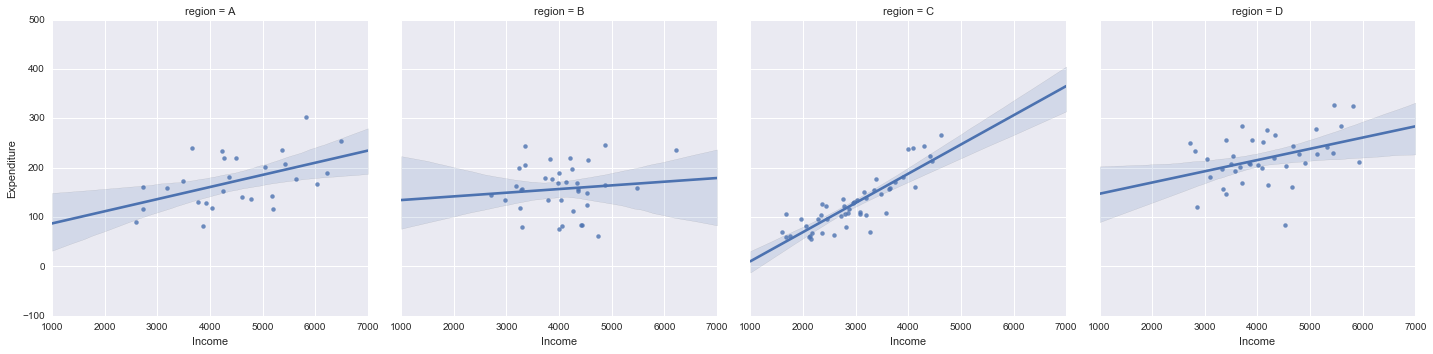

In [56]:
ax = sns.lmplot(x="Income", y="Expenditure", col="region", data=df)

In [42]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats

def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov

def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov

formula = 'Expenditure~region+year+region*year'
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ=2)

eta_squared(aov_table)
omega_squared(aov_table)
aov_table

,sum_sq,df,F,PR(>F),eta_sq,omega_sq
region,188842.575388,3.0,23.262950,2.622251e-12,0.323204,0.307885
year,2006.323264,1.0,0.741459,3.906456e-01,0.003434,-0.001192
region:year,9193.792818,3.0,1.132556,3.380969e-01,0.015735,0.001833
Residual,384239.687537,142.0,NaN,NaN,NaN,NaN


* **What's going on above?**
    * Importing libraries
    * Defining functions
    * Performing ANOVA

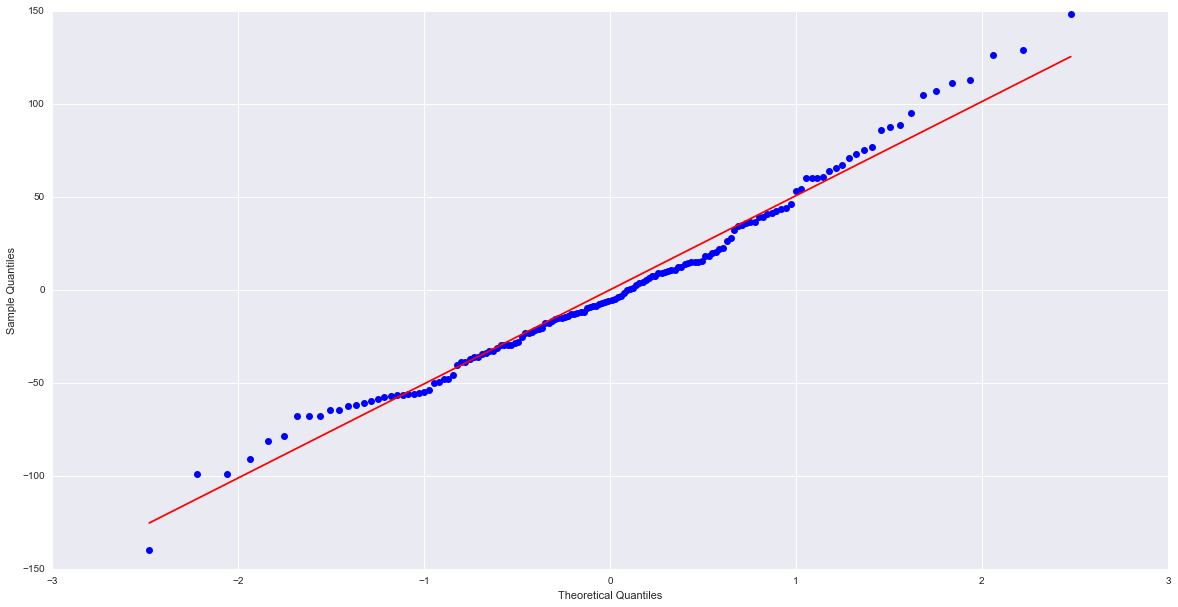

In [58]:
from statsmodels.graphics.gofplots import qqplot
res = model.resid 
fig = qqplot(res, line='s')

In [62]:
stats.skew(res)

0.41793284039435435

In [63]:
stats.kurtosis(res)

0.20930653181870884